In [5]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
sns.set(color_codes = True)

In [7]:
data_lebron = pd.read_csv('/Users/frank.mancuso/Desktop/datasets/BBLL/lebron_career.csv')

In [8]:
data_lebron.columns = map(str.upper, data_lebron.columns)
# change all column names to upper case

In [9]:
data_lebron = data_lebron.drop(['GAME'], axis=1)
data_lebron['DATE'] = pd.to_datetime(data_lebron['DATE'])

In [10]:
data_lebron['MP'] = data_lebron['MP'].astype(str)
data_lebron['MP'] = data_lebron['MP'].str.replace(':','.')
data_lebron['MP'] = data_lebron['MP'].astype(float)
data_lebron['AGE'] = data_lebron['AGE'].astype(str)
data_lebron['AGE'] = data_lebron['AGE'].str.replace('-','.')
data_lebron['AGE'] = data_lebron['AGE'].astype(float)

In [11]:
data_lebron['RESULT'] = data_lebron['RESULT'].str[:1]

In [12]:
data_lebron.head()

,DATE,AGE,TEAM,OPP,RESULT,MP,FG,FGA,FGP,THREE,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
0,2003-10-29,18.303,CLE,SAC,L,42.0,12,20,0.600,0,...,2,4,6,9,4,0,2,25,24.7,-9
1,2003-10-30,18.304,CLE,PHO,L,41.0,8,17,0.471,1,...,2,10,12,8,1,0,7,21,14.7,-3
2,2003-11-01,18.306,CLE,POR,L,39.0,3,12,0.250,0,...,0,4,4,6,2,0,2,8,5.0,-21
3,2003-11-05,18.310,CLE,DEN,L,41.0,3,11,0.273,0,...,2,9,11,7,2,3,2,7,11.2,-3
4,2003-11-07,18.312,CLE,IND,L,44.0,8,18,0.444,1,...,0,5,5,3,0,0,7,23,9.0,-7


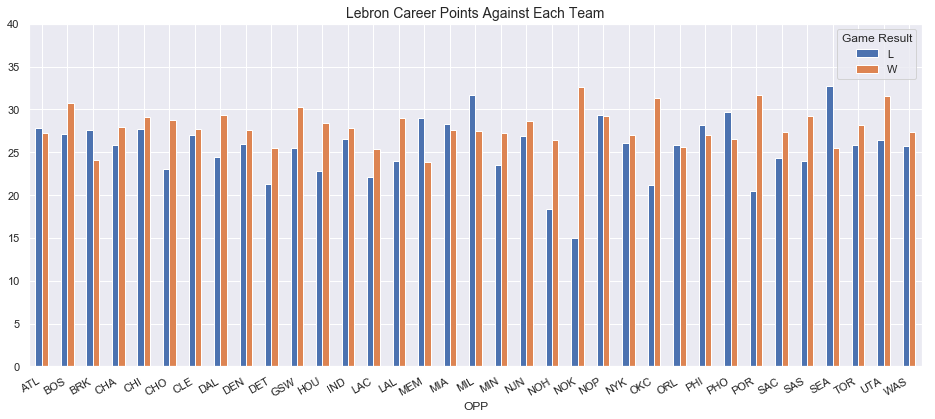

In [13]:
fig, ax = plt.subplots(figsize=(16,7))

data_lebron_opp = data_lebron.pivot_table(columns='RESULT',index='OPP', values='PTS')
data_lebron_opp.plot(ax=ax, kind='bar')

ax.set_ylim(0, 40)
ax.set_title("Lebron Career Points Against Each Team", fontsize=14, )
ax.legend(loc='upper right', title='Game Result')

fig.autofmt_xdate()

In [14]:
data_jordan = pd.read_csv('/Users/frank.mancuso/Desktop/datasets/BBLL/jordan_career.csv')

In [15]:
data_jordan = data_jordan.fillna(0)

In [16]:
data_jordan.columns = map(str.upper, data_jordan.columns)
data_jordan = data_jordan.drop(['GAME'], axis=1)
data_jordan['DATE'] = pd.to_datetime(data_jordan['DATE'])
data_jordan['MP'] = data_jordan['MP'].astype(str)
data_jordan['MP'] = data_jordan['MP'].str.replace(':','.')
data_jordan['MP'] = data_jordan['MP'].astype(float)
data_jordan['AGE'] = data_jordan['AGE'].astype(str)
data_jordan['AGE'] = data_jordan['AGE'].str.replace('-','.')
data_jordan['AGE'] = data_jordan['AGE'].astype(float)

In [17]:
data_jordan['RESULT'] = data_jordan['RESULT'].str[:1]

In [18]:
data_jordan.head()

,DATE,AGE,TEAM,OPP,RESULT,MP,FG,FGA,FGP,THREE,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
0,1984-10-26,21.252,CHI,WSB,W,40.0,5,16,0.313,0,...,1,5,6,7,2,4,5,16,12.5,0.0
1,1984-10-27,21.253,CHI,MIL,L,34.0,8,13,0.615,0,...,3,2,5,5,2,1,3,21,19.4,0.0
2,1984-10-29,21.255,CHI,MIL,W,34.0,13,24,0.542,0,...,2,2,4,5,6,2,3,37,32.9,0.0
3,1984-10-30,21.256,CHI,KCK,W,36.0,8,21,0.381,0,...,2,2,4,5,3,1,6,25,14.7,0.0
4,1984-11-01,21.258,CHI,DEN,L,33.0,7,15,0.467,0,...,3,2,5,5,1,1,2,17,13.2,0.0


In [19]:
data_jordan.describe()

,AGE,MP,FG,FGA,FGP,THREE,THREEATT,THREEP,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0
mean,29.479615,38.258396,11.373134,22.888993,0.495741,0.541978,1.658582,0.188906,6.834888,8.182836,...,1.555970,4.667910,6.223881,5.254664,2.345149,0.833022,2.727612,30.123134,23.440951,0.0
std,5.349324,5.708564,3.825897,5.935995,0.108767,0.970196,1.752960,0.310700,4.075361,4.630327,...,1.442532,2.569624,3.016647,2.722709,1.656353,1.011194,1.733523,9.752002,9.487120,0.0
min,21.252000,12.000000,1.000000,5.000000,0.111000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1.400000,0.0
25%,25.267500,36.000000,9.000000,19.000000,0.423000,0.000000,0.000000,0.000000,4.000000,5.000000,...,0.000000,3.000000,4.000000,3.000000,1.000000,0.000000,1.000000,23.000000,16.800000,0.0
50%,28.315000,39.000000,11.000000,23.000000,0.500000,0.000000,1.000000,0.000000,6.000000,8.000000,...,1.000000,4.000000,6.000000,5.000000,2.000000,1.000000,3.000000,30.000000,23.450000,0.0
75%,33.335500,42.000000,14.000000,27.000000,0.571000,1.000000,3.000000,0.333000,10.000000,11.000000,...,2.000000,6.000000,8.000000,7.000000,3.000000,1.000000,4.000000,36.000000,29.600000,0.0
max,40.058000,56.000000,27.000000,49.000000,0.828000,7.000000,12.000000,1.000000,26.000000,27.000000,...,8.000000,14.000000,18.000000,17.000000,10.000000,6.000000,9.000000,69.000000,64.600000,0.0


In [20]:
data_lebron.describe()

,AGE,MP,FG,FGA,FGP,THREE,THREEATT,THREEP,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1092.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,25.644777,38.620830,9.866608,19.585689,0.505467,1.409894,4.103357,0.309266,6.005300,8.126325,...,1.212898,6.136926,7.349823,7.163428,1.640459,0.782686,3.463781,27.148410,22.224735,5.467314
std,4.334470,5.062429,3.099422,4.868082,0.114112,1.396538,2.346039,0.253228,3.449518,4.220171,...,1.184072,2.684365,3.004192,2.880583,1.313962,0.924440,1.834321,7.887419,7.790812,12.712345
min,18.303000,17.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000
25%,22.035500,35.577500,8.000000,16.000000,0.429000,0.000000,2.000000,0.000000,4.000000,5.000000,...,0.000000,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,22.000000,17.000000,-3.000000
50%,25.335000,39.025000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,6.000000,8.000000,...,1.000000,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,27.000000,22.600000,6.000000
75%,29.319250,42.100000,12.000000,23.000000,0.579000,2.000000,5.000000,0.500000,8.000000,11.000000,...,2.000000,8.000000,9.000000,9.000000,2.000000,1.000000,5.000000,32.000000,27.200000,14.000000
max,33.081000,55.000000,23.000000,36.000000,0.929000,8.000000,13.000000,1.000000,24.000000,28.000000,...,7.000000,17.000000,19.000000,19.000000,7.000000,5.000000,11.000000,61.000000,53.200000,39.000000


In [21]:
ser1 = data_lebron.mean()
ser2 = data_jordan.mean()

lebron_mean = pd.DataFrame(ser1).transpose()
jordan_mean = pd.DataFrame(ser2).transpose()

dataset = pd.DataFrame(pd.concat([lebron_mean, jordan_mean], ignore_index=True))


In [22]:
dataset = dataset.rename(index={0:'Lebron', 1:'Jordan'})

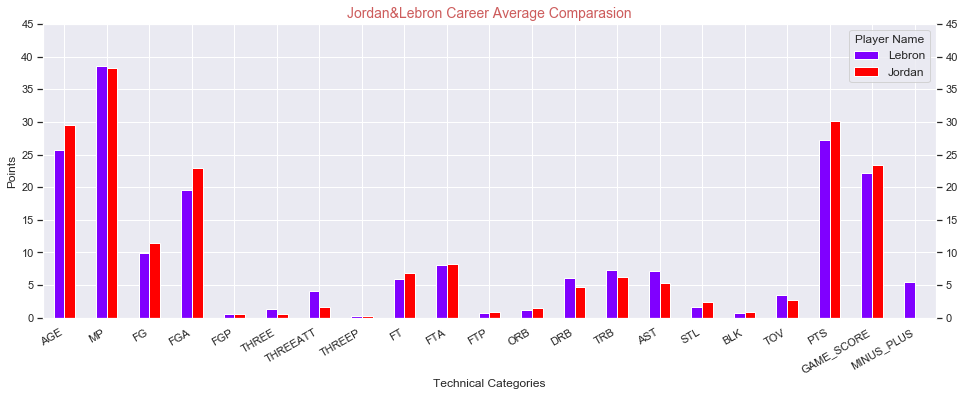

In [23]:
fig, ax = plt.subplots(figsize=(16,6))

dataset.transpose().plot(ax=ax, kind='bar', colormap='rainbow')

ax.set_title("Jordan&Lebron Career Average Comparasion", fontsize=14, color='indianred')
ax.set_xlabel("Technical Categories", fontsize=12)
ax.set_ylabel("Points", fontsize=12)

ax.set_ylim(0, 45)
ax.legend(fontsize=12, title='Player Name')
ax.tick_params('y', direction='out', left=True, right=True, labelright=True, labelleft=True)

fig.autofmt_xdate()